# <center><img src="https://raw.githubusercontent.com/facebookresearch/detectron2/master/.github/Detectron2-Logo-Horz.svg"><center/>

<h2><center> <a href="https://github.com/facebookresearch/detectron2">Detectron2</a> is a PyTorch based modular object detection library</center></h2>

<h4 style="text-align: right, line-height: 3.5em;"> Detectron 2 is a next-generation open-source object detection system from Facebook AI Research. It can be used to train various state-of-the-art models like <a href="http://densepose.org/">Densepose </a> and <a href="https://ai.facebook.com/blog/improving-scene-understanding-through-panoptic-segmentation/">panoptic feature pyramid networks</a> for detection tasks such as bounding-box detection, instance and semantic segmentation, and person keypoint detection. With a modular design, Detectron2 is flexible and extensible, and able to provide fast training on single or multiple GPU servers. </h4>
    
    
<h4> I hope that releasing Detectron2 will continue to accelerate progress in the area of object detection and segmentation. This Kernel is my attempt of contributing to the progress. </h4>   

* I have created another notebook as a continuation of this, that is used to detect damaged parts of a car like rear bumper, front bumper, hood etc. You can find it here [https://www.kaggle.com/lplenka/detectron2-car-damaged-parts-detection](https://www.kaggle.com/lplenka/detectron2-car-damaged-parts-detection).*

### Installation
* Most of the libraries required for visualization like [skimage](https://scikit-image.org/docs/dev/api/skimage.html) and [matplotlib](https://matplotlib.org/) come preinstalled in kaggle environment.
* One library required to visualize COCO dataset is [Pycocotools]() which can be installed using the following command.
`pip install 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI`

### <h3 class="list-group-item list-group-item-action active" data-toggle="list" style='background:black; border:0' role="tab" aria-controls="home"><center>Import Libraries</center></h3>

In [4]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
import random
pylab.rcParams['figure.figsize'] = (8.0, 10.0)# Import Libraries

# For visualization
import os
import seaborn as sns
from matplotlib import colors
from tensorboard.backend.event_processing import event_accumulator as ea
from PIL import Image

<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='background:black; border:0' role="tab" aria-controls="home"><center>Set constant variables</center></h3>

In [7]:
# I am visualizing some images in the 'val/' directory

# dataDir='../input/coco-car-damage-detection-dataset/val'
dataDir='./train'
# dataType='COCO_val_annos'
dataType='via_project_19Jul2021_9h46m_coco'
# mul_dataType='COCO_mul_val_annos'
annFile='{}/{}.json'.format(dataDir,dataType)
# mul_annFile='{}/{}.json'.format(dataDir,mul_dataType)
# img_dir = "../input/coco-car-damage-detection-dataset/img"
img_dir = "./train"

<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='background:black; border:0' role="tab" aria-controls="home"><center> Initialize the COCO API</center></h3>

In [8]:
# initialize coco api for instance annotations
coco=COCO(annFile)
#mul_coco=COCO(mul_annFile)

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='background:black; border:0' role="tab" aria-controls="home"><center> Display damage categories and supercategories</center></h3>

In [9]:
# display categories and supercategories

#Single Class #Damage dataset
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories for damages: \n{}\n'.format(', '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories for damages: \n{}\n'.format(', '.join(nms)))

# #Multi Class #Parts dataset

# mul_cats = mul_coco.loadCats(mul_coco.getCatIds())
# mul_nms=[cat['name'] for cat in mul_cats]
# print('COCO categories for parts: \n{}\n'.format(', '.join(mul_nms)))

# mul_nms = set([mul_cat['supercategory'] for mul_cat in mul_cats])
# print('COCO supercategories for parts: \n{}\n'.format(', '.join(mul_nms)))

COCO categories for damages: 
dent, scratch, destroy

COCO supercategories for damages: 
damage



In [10]:
# get all images containing 'damage' category, select one at random
catIds = coco.getCatIds(catNms=['damage']);
imgIds = coco.getImgIds(catIds=catIds );

In [11]:


random_img_id = random.choice(imgIds)
print("{} image id was selected at random from the {} list".format(random_img_id, imgIds))

424 image id was selected at random from the [1, 3, 4, 7, 8, 9, 10, 13, 14, 15, 16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 28, 29, 30, 31, 32, 34, 35, 36, 37, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 69, 70, 71, 72, 74, 75, 76, 78, 79, 81, 83, 84, 86, 89, 91, 92, 93, 94, 99, 100, 102, 103, 104, 105, 106, 107, 109, 114, 116, 117, 120, 122, 123, 124, 125, 126, 127, 129, 131, 132, 133, 134, 137, 140, 142, 144, 147, 148, 149, 151, 153, 154, 155, 158, 159, 160, 161, 164, 165, 166, 167, 169, 173, 177, 181, 182, 184, 185, 186, 189, 191, 192, 193, 197, 198, 200, 202, 205, 207, 208, 209, 210, 213, 215, 216, 217, 218, 222, 223, 224, 226, 228, 229, 230, 231, 233, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 252, 255, 259, 260, 261, 263, 265, 268, 269, 270, 271, 272, 275, 276, 277, 278, 280, 282, 283, 284, 285, 286, 287, 289, 290, 291, 293, 295, 296, 297, 298, 299, 301, 302, 303, 304, 306, 307, 309, 312, 

In [12]:
# Load the image
imgId = coco.getImgIds(imgIds = [random_img_id])
img = coco.loadImgs(imgId)[0]
print("Image details \n",img)

Image details 
 {'id': 424, 'width': 1024, 'height': 768, 'file_name': '424.jpg', 'license': 0, 'date_captured': ''}


<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='background:black; border:0' role="tab" aria-controls="home"><center> Raw Image</center></h3>

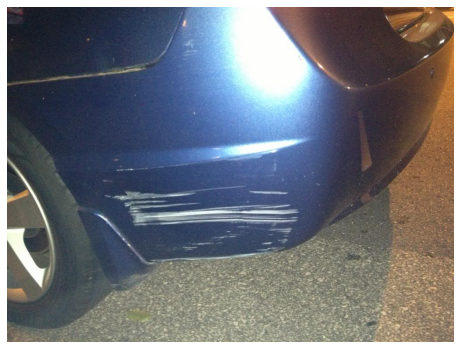

In [13]:
I = io.imread(img_dir + '/' + img['file_name'])
plt.axis('off')
plt.imshow(I)
plt.show()

<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='background:black; border:0' role="tab" aria-controls="home"><center> Image with damage annotation</center></h3>

In [14]:
#get damage annotations
annIds = coco.getAnnIds(imgIds=imgId,iscrowd=None)
anns = coco.loadAnns(annIds)

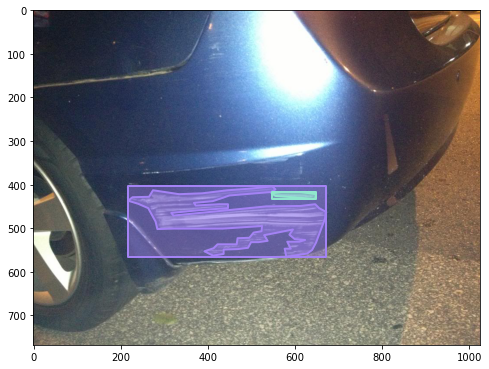

In [15]:
#Plot damages
plt.imshow(I)
plt.axis('on')
coco.showAnns(anns, draw_bbox=True )

<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='background:black; border:0' role="tab" aria-controls="home"><center> Image with parts annotation</center></h3>

In [16]:
# #get parts annotations
# mul_annIds = mul_coco.getAnnIds(imgIds=imgId,iscrowd=None)
# mul_anns = mul_coco.loadAnns(mul_annIds)

In [17]:
# # Create a dictionary between category_id and category name
# category_map = dict()

# for ele in list(mul_coco.cats.values()):
#     category_map.update({ele['id']:ele['name']})

In [18]:
# category_map

In [19]:
# #Create a list of parts in the image
# parts = []
# for region in mul_anns:
#     parts.append(category_map[region['category_id']])

# print("Parts are:", parts) 

# #Plot Parts
# I = io.imread(img_dir + '/' + img['file_name'])
# plt.imshow(I)
# plt.axis('on')
# mul_coco.showAnns(mul_anns, draw_bbox=True )

<h2 class="list-group-item list-group-item-action active" data-toggle="list" style='background:black;' role="tab" aria-controls="home"><center> Training Object detection model using Detectron 2</center></h2>

<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='background:black;' role="tab" aria-controls="home"><center> Installation </center></h3>

In [20]:
# Install detectron 2
# !python -m pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu111/torch1.8/index.html

<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='background:black;' role="tab" aria-controls="home"><center> Import Libraries required for training</center></h3>

In [21]:
import detectron2

In [22]:
from detectron2.utils.logger import setup_logger

In [23]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
import matplotlib.pyplot as plt
import skimage.io as io

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.engine import DefaultTrainer
from detectron2.utils.visualizer import ColorMode
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader

# Set base params
plt.rcParams["figure.figsize"] = [16,9]

In [24]:
# To find out inconsistent CUDA versions, if there is not "failed" word in this output then things are fine.
!python -m detectron2.utils.collect_env

----------------------  -----------------------------------------------------------------------------
sys.platform            linux
Python                  3.7.10 (default, Jun  4 2021, 14:48:32) [GCC 7.5.0]
numpy                   1.20.3
detectron2              0.4 @/anaconda/envs/py37_detectron2/lib/python3.7/site-packages/detectron2
Compiler                GCC 7.3
CUDA compiler           CUDA 10.1
detectron2 arch flags   3.7, 5.0, 5.2, 6.0, 6.1, 7.0, 7.5
DETECTRON2_ENV_MODULE   <not set>
PyTorch                 1.8.0 @/anaconda/envs/py37_detectron2/lib/python3.7/site-packages/torch
PyTorch debug build     False
GPU available           True
GPU 0                   Tesla P100-PCIE-16GB (arch=6.0)
CUDA_HOME               /usr
Pillow                  8.3.1
torchvision             0.9.0 @/anaconda/envs/py37_detectron2/lib/python3.7/site-packages/torchvision
torchvision arch flags  3.5, 5.0, 6.0, 7.0, 7.5
fvcore                  0.1.3.post20210317
cv2                     4.5.3
-----------

In [25]:
# To find out inconsistent CUDA versions, if there is not "failed" word in this output then things are fine.
# !python -m detectron2.utils.collect_env

<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='background:black;' role="tab" aria-controls="home"><center>  Register Car Damage Dataset </center></h3>

In [26]:
dataset_dir = "./"
train_dir = "train/"
test_dir = "test/"

If you want to use a custom dataset while also reusing detectron2’s data loaders, you will need to

*  Register your dataset (i.e., tell detectron2 how to obtain your dataset).

* Optionally, register metadata for your dataset.

In [27]:
from detectron2.data.datasets import register_coco_instances
register_coco_instances("train", {}, os.path.join(dataset_dir,train_dir,"via_project_19Jul2021_9h46m_coco.json"), os.path.join(dataset_dir,train_dir))
register_coco_instances("test", {}, os.path.join(dataset_dir,test_dir,"via_project_17Jul2021_2h51m_coco.json"), os.path.join(dataset_dir,test_dir))

In [28]:
dataset_dicts = DatasetCatalog.get("train")
metadata_dicts = MetadataCatalog.get("train")

FileNotFoundError: [Errno 2] No such file or directory: './train/via_project_16Jul2021_22h7m_coco.json'

<h2 class="list-group-item list-group-item-action active" data-toggle="list" style='background:black;' role="tab" aria-controls="home"><center> Model Train </center></h2>

In [24]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
import matplotlib.pyplot as plt
import skimage.io as io

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.engine import DefaultTrainer
from detectron2.utils.visualizer import ColorMode
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader

from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

In [25]:
# cfg = get_cfg()
# cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml"))
# cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml")ㅎ

In [26]:
# cfg = get_cfg()
# # add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
# cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
# cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# # Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
# cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
# predictor = DefaultPredictor(cfg)
# outputs = predictor(I)

In [27]:
#Implementing my own Trainer Module here to use the COCO validation evaluation during training
# TODO: add data custom augmentation 
class CocoTrainer(DefaultTrainer):

  @classmethod
  def build_evaluator(cls, cfg, dataset_name, output_folder=None):

    if output_folder is None:
        os.makedirs("coco_eval", exist_ok=True)
        output_folder = "coco_eval"

    return COCOEvaluator(dataset_name, cfg, False, output_folder)

In [28]:
cfg1 = get_cfg()
cfg1.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml")) #Get the basic model configuration from the model zoo 
#Passing the Train and Validation sets
cfg1.DATASETS.TRAIN = ("train",)
cfg1.DATASETS.TEST = ("test",)
# Number of data loading threads
cfg1.DATALOADER.NUM_WORKERS = 4
cfg1.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml")  # Let training initialize from model zoo
# Number of images per batch across all machines.
cfg1.SOLVER.IMS_PER_BATCH = 4
cfg1.SOLVER.BASE_LR = 0.0125  # pick a good LearningRate
cfg1.SOLVER.MAX_ITER = 1500  #No. of iterations   
cfg1.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 256  
cfg1.MODEL.ROI_HEADS.NUM_CLASSES = 4 # No. of classesk
cfg1.TEST.EVAL_PERIOD = 500 # No. of iterations after which the Validation Set is evaluated. 
os.makedirs(cfg1.OUTPUT_DIR, exist_ok=True)
trainer = CocoTrainer(cfg1) 
trainer.resume_or_load(resume=False)
trainer.train()

[07/18 09:22:18 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

[07/18 09:22:18 d2.data.datasets.coco]: Loaded 321 images in COCO format from ./train/via_project_16Jul2021_22h7m_coco.json
[07/18 09:22:18 d2.data.build]: Removed 0 images with no usable annotations. 321 images left.
[07/18 09:22:18 d2.data.build]: Distribution of instances among all 4 categories:
|  category  | #instances   |  category  | #instances   |  category  | #instances   |
|:----------:|:-------------|:----------:|:-------------|:----------:|:-------------|
|    dent    | 247          |  scratch   | 346          |   broken   | 70           |
|  destory   | 56           |            |              |            |              |
|   total    | 719          |            |              |            |              |
[07/18 09:22:18 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in training: [ResizeShortestEdge(short_edge_length=(640, 672, 704, 736, 768, 800), max_size=1333, sample_style='choice'), RandomFlip()]
[07/18 09:22:18 d2.data.build]: Using training sampler Tra

Skip loading parameter 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (81, 1024) in the checkpoint but (5, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (81,) in the checkpoint but (5,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (320, 1024) in the checkpoint but (16, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (320,) in the checkpoint but (16,) in the model! You might want to double check if this is expected.


[07/18 09:22:18 d2.engine.train_loop]: Starting training from iteration 0
[07/18 09:22:34 d2.utils.events]:  eta: 0:20:23  iter: 19  total_loss: 1.664  loss_cls: 1.148  loss_box_reg: 0.294  loss_rpn_cls: 0.1005  loss_rpn_loc: 0.0269  time: 0.7869  data_time: 0.0169  lr: 0.00024976  max_mem: 6856M
[07/18 09:22:50 d2.utils.events]:  eta: 0:19:43  iter: 39  total_loss: 0.8272  loss_cls: 0.3923  loss_box_reg: 0.3339  loss_rpn_cls: 0.04465  loss_rpn_loc: 0.02  time: 0.7762  data_time: 0.0079  lr: 0.00049951  max_mem: 6856M
[07/18 09:23:05 d2.utils.events]:  eta: 0:19:12  iter: 59  total_loss: 0.688  loss_cls: 0.3214  loss_box_reg: 0.2844  loss_rpn_cls: 0.03758  loss_rpn_loc: 0.01765  time: 0.7630  data_time: 0.0079  lr: 0.00074926  max_mem: 6856M
[07/18 09:23:20 d2.utils.events]:  eta: 0:19:05  iter: 79  total_loss: 0.7195  loss_cls: 0.3399  loss_box_reg: 0.3419  loss_rpn_cls: 0.02815  loss_rpn_loc: 0.01978  time: 0.7651  data_time: 0.0085  lr: 0.00099901  max_mem: 6856M
[07/18 09:23:35 d2.

[07/18 09:28:50 d2.evaluation.fast_eval_api]: COCOeval_opt.accumulate() finished in 0.01 seconds.
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.123
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.285
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.075
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.042
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.093
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.215
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.154
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.271
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.281
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.084
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.219
 Average Recall     (A

[07/18 09:35:16 d2.data.common]: Serializing 86 elements to byte tensors and concatenating them all ...
[07/18 09:35:16 d2.data.common]: Serialized dataset takes 0.04 MiB
WARNING [07/18 09:35:16 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[07/18 09:35:16 d2.evaluation.evaluator]: Start inference on 86 images
[07/18 09:35:17 d2.evaluation.evaluator]: Inference done 11/86. 0.0710 s / img. ETA=0:00:05
[07/18 09:35:22 d2.evaluation.evaluator]: Inference done 66/86. 0.0889 s / img. ETA=0:00:01
[07/18 09:35:24 d2.evaluation.evaluator]: Total inference time: 0:00:07.309774 (0.090244 s / img per device, on 1 devices)
[07/18 09:35:24 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:07 (0.088407 s / img per device, on 1 devices)
[07/18 09:35:24 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[07/18 09:35:24 d2.evaluation.coco_evaluation]: Saving results to 

[07/18 09:40:35 d2.utils.events]:  eta: 0:01:21  iter: 1399  total_loss: 0.3684  loss_cls: 0.1259  loss_box_reg: 0.2236  loss_rpn_cls: 0.005437  loss_rpn_loc: 0.01277  time: 0.7702  data_time: 0.0083  lr: 0.0125  max_mem: 6856M
[07/18 09:40:50 d2.utils.events]:  eta: 0:01:05  iter: 1419  total_loss: 0.3875  loss_cls: 0.1424  loss_box_reg: 0.2311  loss_rpn_cls: 0.006601  loss_rpn_loc: 0.01175  time: 0.7700  data_time: 0.0097  lr: 0.0125  max_mem: 6856M
[07/18 09:41:05 d2.utils.events]:  eta: 0:00:49  iter: 1439  total_loss: 0.3618  loss_cls: 0.1318  loss_box_reg: 0.2033  loss_rpn_cls: 0.009191  loss_rpn_loc: 0.0163  time: 0.7700  data_time: 0.0084  lr: 0.0125  max_mem: 6856M
[07/18 09:41:21 d2.utils.events]:  eta: 0:00:32  iter: 1459  total_loss: 0.383  loss_cls: 0.1168  loss_box_reg: 0.2403  loss_rpn_cls: 0.004515  loss_rpn_loc: 0.0143  time: 0.7701  data_time: 0.0082  lr: 0.0125  max_mem: 6856M
[07/18 09:41:36 d2.utils.events]:  eta: 0:00:16  iter: 1479  total_loss: 0.2924  loss_cls: 

[07/18 09:42:09 d2.evaluation.coco_evaluation]: Per-category bbox AP: 
| category   | AP     | category   | AP     | category   | AP    |
|:-----------|:-------|:-----------|:-------|:-----------|:------|
| dent       | 16.949 | scratch    | 19.643 | broken     | 4.713 |
| destory    | 8.416  |            |        |            |       |
[07/18 09:42:09 d2.engine.defaults]: Evaluation results for test in csv format:
[07/18 09:42:09 d2.evaluation.testing]: copypaste: Task: bbox
[07/18 09:42:09 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[07/18 09:42:09 d2.evaluation.testing]: copypaste: 12.4304,31.2396,10.5256,5.9231,10.0035,20.7909


In [29]:
# cfg1 = get_cfg()
# cfg1.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml"))
# cfg1.DATASETS.TRAIN = ("train",)
# cfg1.DATASETS.TEST = ("test",)
# cfg1.DATALOADER.NUM_WORKERS = 4
# cfg1.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml")  # Let training initialize from model zoo
# cfg1.SOLVER.IMS_PER_BATCH = 4
# cfg1.SOLVER.BASE_LR = 0.001  # pick a good LR
# cfg1.SOLVER.WARMUP_ITERS = 700
# cfg1.SOLVER.MAX_ITER = 800 #adjust up if val mAP is still rising, adjust down if overfit
# cfg1.SOLVER.STEPS = []
# cfg1.SOLVER.GAMMA = 0.05
# cfg1.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128   # faster, and good enough for this  dataset (default: 512)
# cfg1.MODEL.ROI_HEADS.NUM_CLASSES = 4  # only has one class (damage) + 1
# cfg1.MODEL.RETINANET.NUM_CLASSES = 4 # only has one class (damage) + 1
# cfg1.TEST.EVAL_PERIOD = 600



# # Clear any logs from previous runs
# #TODO add timestamp to logs
# !rm -rf cfg.OUTPUT_DIR


# os.makedirs(cfg1.OUTPUT_DIR, exist_ok=True)
# trainer = CocoTrainer(cfg1) 
# trainer.resume_or_load(resume=False)
# trainer.train()

<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='background:black;' role="tab" aria-controls="home"><center>  Model Metrics and Hyper Parameters Visualization </center></h3>

In [30]:
# Look at training curves in tensorboard:
# %reload_ext tensorboard
# %tensorboard --logdir ./output

### Note: Unfortunately, there is some issue with tensorboard in Kaggle so I thought of using seaborn to visualize the plots.

Source: https://www.kaggle.com/product-feedback/89671#764494

In [39]:
def smooth(scalars, weight=0.6):
    """
    Reference: https://github.com/plotly/dash-live-model-training/blob/master/app.py#L163
    """
    last = scalars[0]
    smoothed = list()
    for point in scalars:
        smoothed_val = last * weight + (1 - weight) * point
        smoothed.append(smoothed_val)
        last = smoothed_val
    return smoothed


def plot(logdir: str, savedir: str, smoothing: float = 0.6, no_title=False, no_legend=False, no_axis_labels=False):
    """ re-draw the tf summary events plots  using seaborn
    :param logdir: Path to the directory having event logs
    :param savedir: Path to save the seaborn graphs
    :param smoothing: smoothing window space for the plots
    """
    assert 0 <= smoothing <= 1, 'Smoothing value should be in [0,1]'
    
    plots = []
    
    sns.set(style="darkgrid")
    sns.set_context("paper")

    # Collect data
    # we recognize all files which have tfevents
    scalars_info = {}
    for root, dirs, files in os.walk(logdir):
        for event_file in [x for x in files if 'tfevents' in x]:
            event_path = os.path.join(root, event_file)

            acc = ea.EventAccumulator(event_path)
            acc.Reload()

            # only support scalar now
            scalar_list = acc.Tags()['scalars']
            for tag in scalar_list:
                x = [s.step for s in acc.Scalars(tag)]
                y = [s.value for s in acc.Scalars(tag)]
                data = {'x': x, 'y': y, 'legend': root.split(logdir)[1][1:] if root != logdir else None}
                if tag not in scalars_info:
                    scalars_info[tag] = [data]
                else:
                    scalars_info[tag].append(data)

    # We recognize groups assuming each group name has /
    # And, each group is saved in a separate directory
    for tag, tag_data in scalars_info.items():
        _split = tag.split('/')
        if len(_split) <= 1:
            _path = os.path.join(savedir, 'seaborn')
            _name = _split[0]
        else:
            _path = os.path.join(savedir, 'seaborn', _split[0])
            _name = ''.join(_split[1:])

        os.makedirs(_path, exist_ok=True)

        color_list = list(sns.color_palette(palette='dark', n_colors=len(tag_data)))[::-1]
        for data in tag_data:
            x, y = data['x'], data['y']
            y_smooth = smooth(y, weight=smoothing)
            current_color = color_list.pop()
            _plt = sns.lineplot(x, y, color=colors.to_rgba(current_color, alpha=0.4))
            _legend = data['legend'] if not no_legend else None
            _plt = sns.lineplot(x, y_smooth, label=data['legend'], color=current_color)

        if not no_axis_labels:
            _plt.set(xlabel='x', ylabel='y')
        if not no_title:
            _plt.set_title(_name.capitalize())
        
        plots.append(os.path.join(_path, _name + '.png'))
        plt.savefig(os.path.join(_path, _name + '.png'))
        plt.clf()
    return plots

In [40]:
plots = plot(logdir= './output', savedir= './')

/anaconda/envs/py37_detectron2/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/anaconda/envs/py37_detectron2/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/anaconda/envs/py37_detectron2/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpret

/anaconda/envs/py37_detectron2/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/anaconda/envs/py37_detectron2/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/anaconda/envs/py37_detectron2/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpret

/anaconda/envs/py37_detectron2/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/anaconda/envs/py37_detectron2/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/anaconda/envs/py37_detectron2/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpret

/anaconda/envs/py37_detectron2/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/anaconda/envs/py37_detectron2/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/anaconda/envs/py37_detectron2/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpret

/anaconda/envs/py37_detectron2/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/anaconda/envs/py37_detectron2/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/anaconda/envs/py37_detectron2/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpret

/anaconda/envs/py37_detectron2/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/anaconda/envs/py37_detectron2/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/anaconda/envs/py37_detectron2/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpret

/anaconda/envs/py37_detectron2/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/anaconda/envs/py37_detectron2/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/anaconda/envs/py37_detectron2/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpret

/anaconda/envs/py37_detectron2/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/anaconda/envs/py37_detectron2/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/anaconda/envs/py37_detectron2/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpret

/anaconda/envs/py37_detectron2/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/anaconda/envs/py37_detectron2/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/anaconda/envs/py37_detectron2/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpret

/anaconda/envs/py37_detectron2/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/anaconda/envs/py37_detectron2/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/anaconda/envs/py37_detectron2/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpret

/anaconda/envs/py37_detectron2/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/anaconda/envs/py37_detectron2/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/anaconda/envs/py37_detectron2/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpret

/anaconda/envs/py37_detectron2/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/anaconda/envs/py37_detectron2/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/anaconda/envs/py37_detectron2/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpret

/anaconda/envs/py37_detectron2/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/anaconda/envs/py37_detectron2/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/anaconda/envs/py37_detectron2/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpret

/anaconda/envs/py37_detectron2/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/anaconda/envs/py37_detectron2/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/anaconda/envs/py37_detectron2/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpret

/anaconda/envs/py37_detectron2/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/anaconda/envs/py37_detectron2/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/anaconda/envs/py37_detectron2/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpret

<Figure size 1152x648 with 0 Axes>

In [41]:
plots

['./seaborn/rpn/num_pos_anchors.png',
 './seaborn/rpn/num_neg_anchors.png',
 './seaborn/roi_head/num_fg_samples.png',
 './seaborn/roi_head/num_bg_samples.png',
 './seaborn/fast_rcnn/cls_accuracy.png',
 './seaborn/fast_rcnn/fg_cls_accuracy.png',
 './seaborn/fast_rcnn/false_negative.png',
 './seaborn/mask_rcnn/accuracy.png',
 './seaborn/mask_rcnn/false_positive.png',
 './seaborn/mask_rcnn/false_negative.png',
 './seaborn/data_time.png',
 './seaborn/total_loss.png',
 './seaborn/loss_cls.png',
 './seaborn/loss_box_reg.png',
 './seaborn/loss_mask.png',
 './seaborn/loss_rpn_cls.png',
 './seaborn/loss_rpn_loc.png',
 './seaborn/lr.png',
 './seaborn/time.png',
 './seaborn/eta_seconds.png',
 './seaborn/bbox/AP.png',
 './seaborn/bbox/AP50.png',
 './seaborn/bbox/AP75.png',
 './seaborn/bbox/APs.png',
 './seaborn/bbox/APm.png',
 './seaborn/bbox/APl.png',
 './seaborn/bbox/AP-dent.png',
 './seaborn/bbox/AP-scratch.png',
 './seaborn/bbox/AP-broken.png',
 './seaborn/bbox/AP-destory.png',
 './seaborn/seg

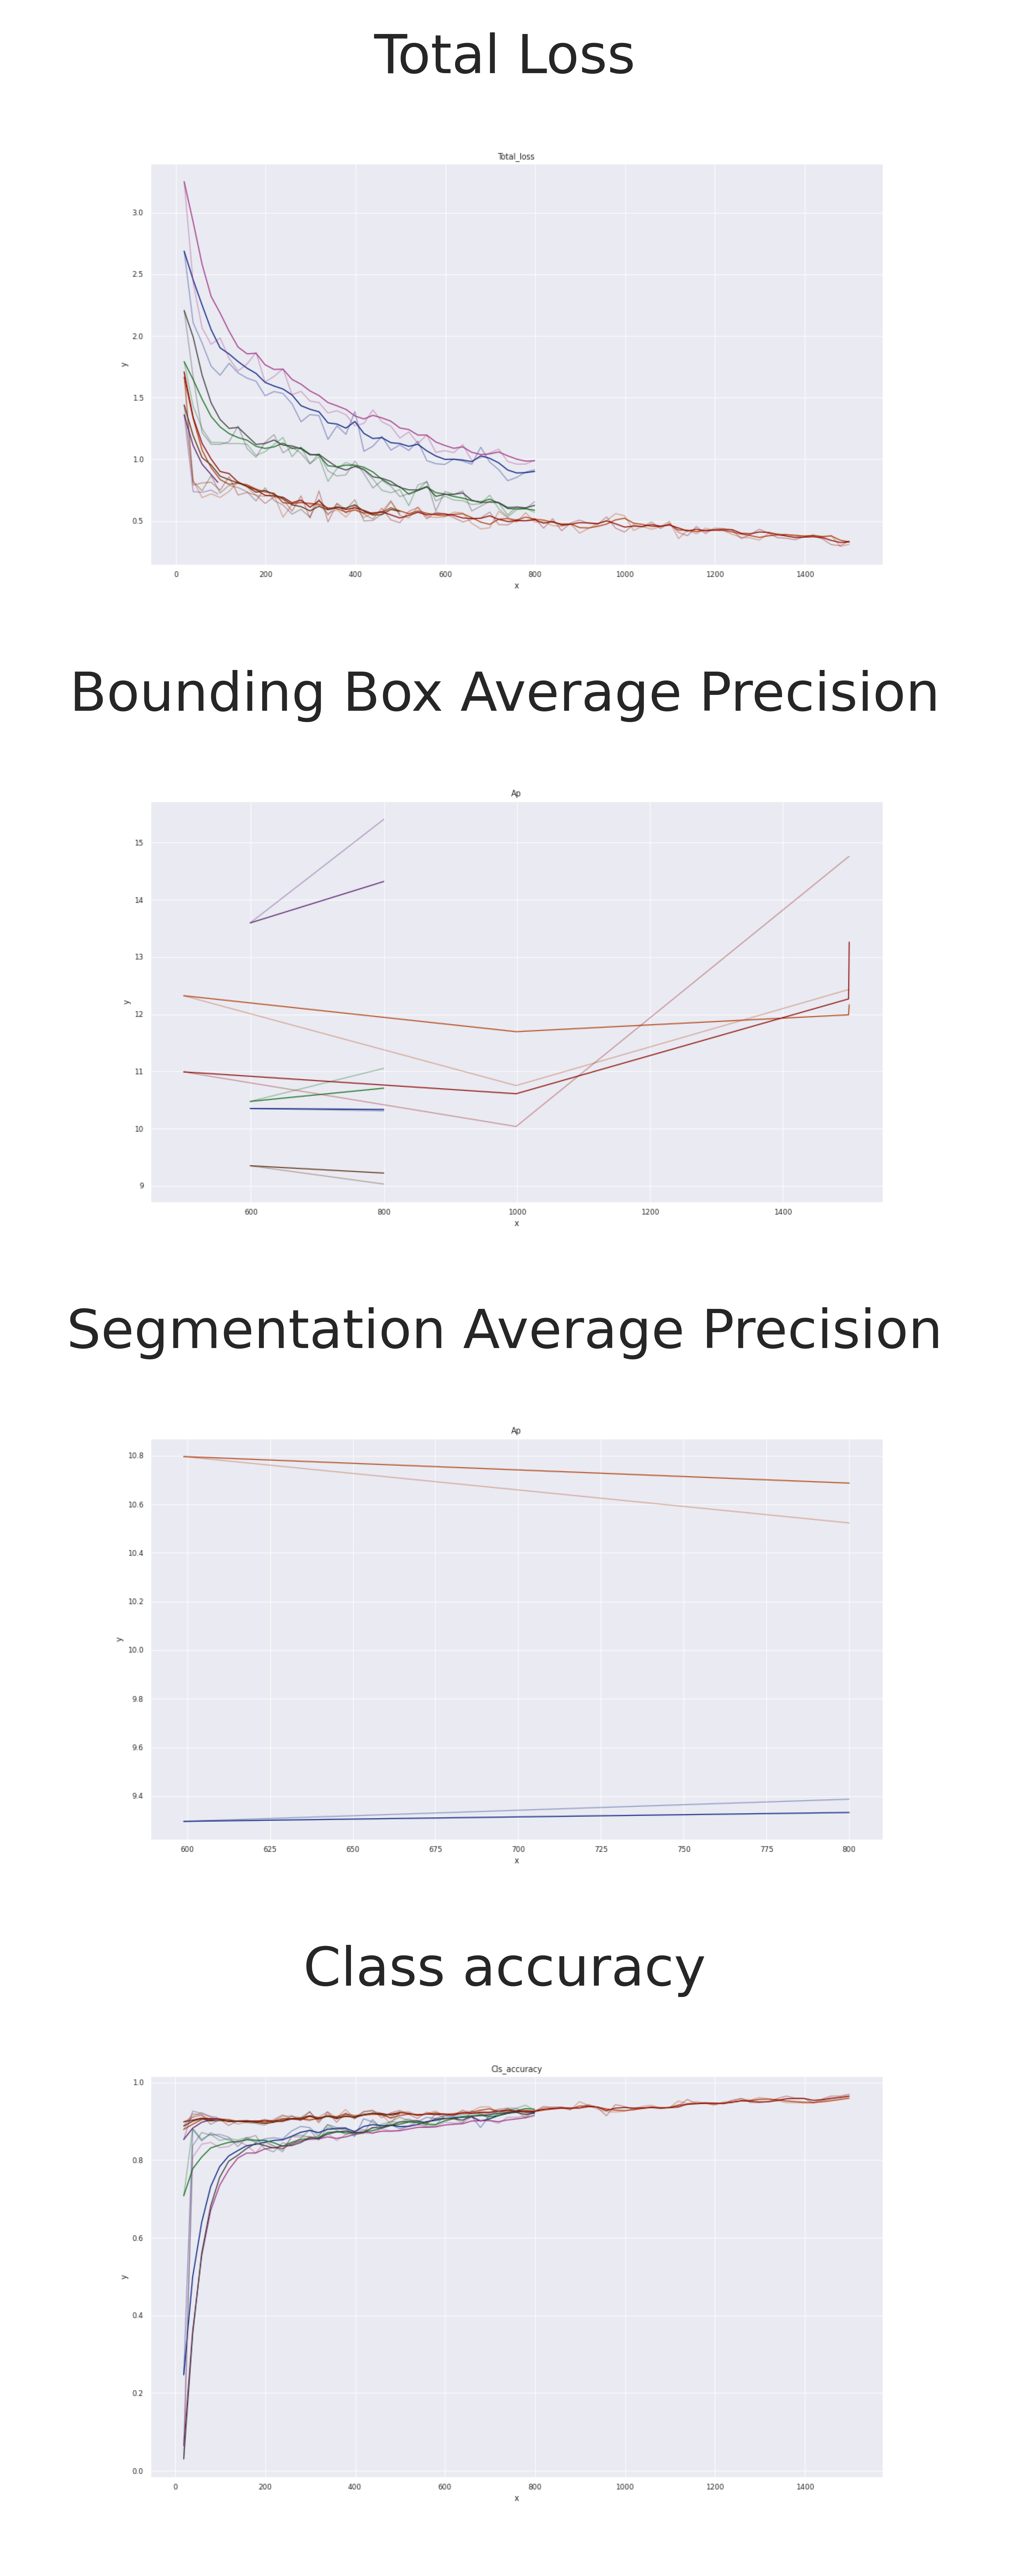

In [42]:
my_dpi = 1000
fig, ax = plt.subplots(4,1, figsize = (12,10), dpi=my_dpi)


ax[0].set_title('Total Loss', fontsize=12)
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].imshow(Image.open('./seaborn/total_loss.png'))

ax[1].set_title('Bounding Box Average Precision', fontsize=12)
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].imshow(Image.open('./seaborn/bbox/AP.png'))

ax[2].set_title('Segmentation Average Precision', fontsize=12)
ax[2].set_xticks([])
ax[2].set_yticks([])
ax[2].imshow(Image.open('./seaborn/segm/AP.png'))

ax[3].set_title('Class accuracy', fontsize=12)
ax[3].set_xticks([])
ax[3].set_yticks([])
ax[3].imshow(Image.open('./seaborn/fast_rcnn/cls_accuracy.png'))

* I think the training worked well as the loss has decreased over the runs.
* The class accuracy and average precision has improved over the runs.

<h2 class="list-group-item list-group-item-action active" data-toggle="list" style='background:black;' role="tab" aria-controls="home"><center> Model Evaluation </center></h2>

In [43]:
evaluator = COCOEvaluator("test", cfg1, False, output_dir="./output/")
val_loader = build_detection_test_loader(cfg1, "test")
print(inference_on_dataset(trainer.model, val_loader, evaluator))

WARNING [07/18 09:44:31 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[07/18 09:44:31 d2.data.datasets.coco]: Loaded 86 images in COCO format from ./test/via_project_17Jul2021_2h51m_coco.json
[07/18 09:44:31 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[07/18 09:44:31 d2.data.common]: Serializing 86 elements to byte tensors and concatenating them all ...
[07/18 09:44:31 d2.data.common]: Serialized dataset takes 0.04 MiB
[07/18 09:44:31 d2.evaluation.evaluator]: Start inference on 86 images
[07/18 09:44:32 d2.evaluation.evaluator]: Inference done 11/86. 0.0711 s / img. ETA=0:00:05
[07/18 09:44:37 d2.evaluation.evaluator]: Inference done 66/86. 0.0889 s / img. ETA=0:00:01
[07/18 09:44:39 d2.evaluation.evaluator]: Total inference time: 0:00:07.297089 (0.090088 s / img per de

<h2 class="list-group-item list-group-item-action active" data-toggle="list" style='background:black;' role="tab" aria-controls="home"><center> Model Inference </center></h2>

In [44]:
cfg1.MODEL.WEIGHTS = os.path.join(cfg1.OUTPUT_DIR, "model_final.pth")
cfg1.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7   # set a custom testing threshold for this model
cfg1.DATASETS.TEST = ("test", )
predictor = DefaultPredictor(cfg1)

In [45]:
val_dataset_dicts = DatasetCatalog.get("test")
val_metadata_dicts = MetadataCatalog.get("test")

[07/18 09:44:40 d2.data.datasets.coco]: Loaded 86 images in COCO format from ./test/via_project_17Jul2021_2h51m_coco.json


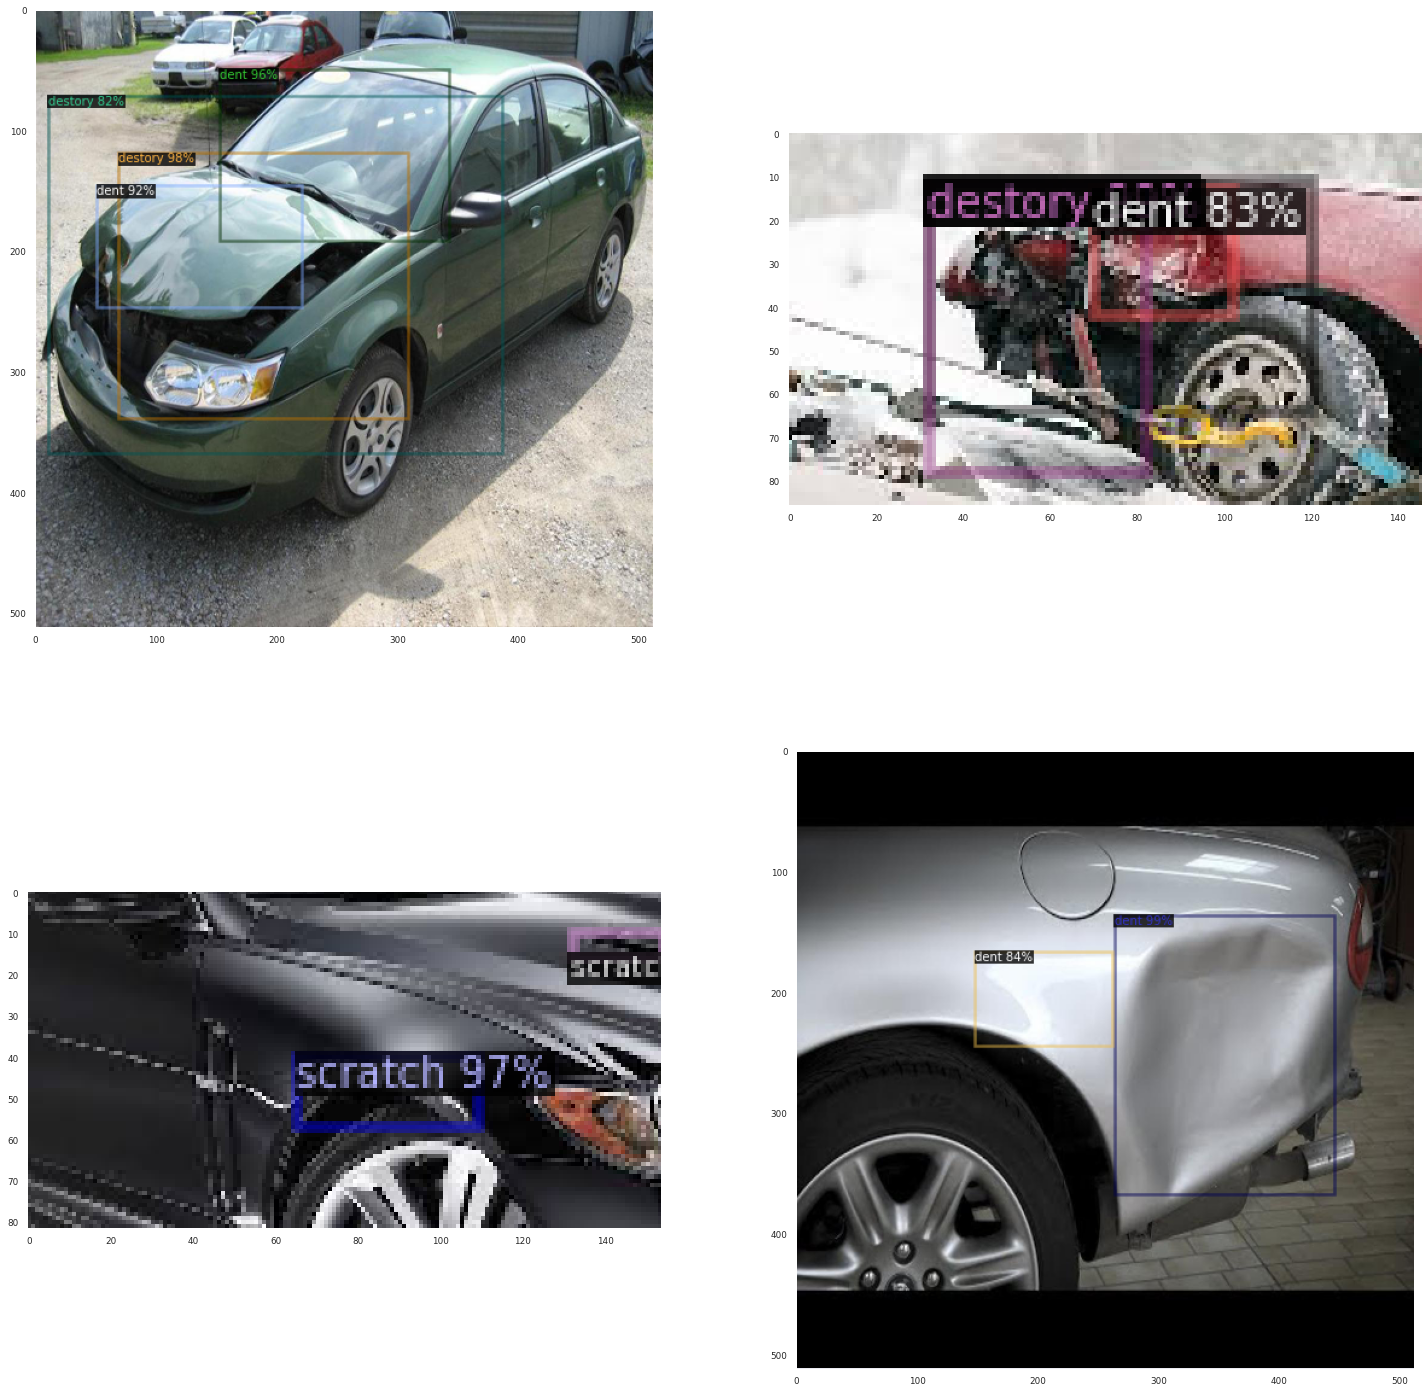

In [46]:
fig, ax = plt.subplots(2, 2, figsize =(25,25))
indices=[ax[0][0],ax[1][0],ax[0][1],ax[1][1] ]
i=-1
for d in random.sample(val_dataset_dicts, 4):
    i=i+1    
    im = io.imread(d["file_name"])
    outputs = predictor(im)
    v = Visualizer(im[:, :, ::-1],
                   metadata=val_metadata_dicts, 
                   scale=0.5, 
                   instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels. This option is only available for segmentation models
    )
    out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    indices[i].grid(False)
    indices[i].imshow(out.get_image()[:, :, ::-1])

### Conclusion
* I think the results are quite fine even when the training data was around 60 images.
* Data augmentation can significantly improve the results.
* I will try doing multiclass object detection next.

### Do give this notebook an upvote if you liked my work, thanks!